### Data of Internet Service Providers in Each Neighborhood of Pittsburgh

The dataset that I chose to interpret contains the information on what service providers are in pittsburgh, what neighborhoods they are in, and how many are in each neighborhood. Of course, the data does not give us all that right away, which is where our data interpretation skills come in. Within this notebook, I was able to get rid of data that I would not be using for our final result, sort the data by providers per neighborhood, and then calculate and sort by providers per acre of each neighborhood to find the best overall coverage. 

In [26]:
import pandas as pd
import numpy as np
import geopandas

In [7]:
ispdata = pd.read_csv("pittsburghispsbyblock.csv", 
                                       index_col="Neighborhood") # use the column named _id as the row index
hooddata = pd.read_csv("RAC223Neighborhoods_.csv")

The first two codeblocks are simple imports of the python packages I am using and the actual dataset that I am getting my data from. In this first block below, I first sort the dataset by each neighborhoood alphabetically. Then, I use the drop method to remove all of the unnessecary data columns from my set.

In [8]:
ispdata = ispdata.sort_values(by=["Neighborhood"])
thislist = ["GEOID", "LogRecNo", "Provider_Id", "FRN", "ProviderName", "DBAName", "HocoNum", "StateAbbr", "BlockCode", "TechCode", "Consumer", "MaxAdDown", "MaxAdUp", "Business", "MaxCIRDown", "MaxCIRUp", "HocoFinal"]
ispdata = ispdata.drop(axis=1,labels=thislist)
ispdata.groupby("Neighborhood").count()

,HoldingCompanyName
Neighborhood,
Allegheny Center,161
Allegheny West,187
Allentown,811
Arlington,477
Arlington Heights,35
...,...
Upper Lawrenceville,542
West End,283
West Oakland,288


For our project, we decided we only wanted to look at the neighborhoods that have Verizon internet. We decided upon this because we all use and trust verizon internet and, to us, it is the best service provider due to converage and 5G capabilities. In the code block below, I used code that we practiced in our weekly excercises to isolate all of the rows with "Verizon Communications Inc." and make a new dataset with only the Verizon neighborhoods.

In [9]:
query_mask = ispdata['HoldingCompanyName'] == 'Verizon Communications Inc.'

verizon = ispdata[query_mask]
verizon

,HoldingCompanyName
Neighborhood,
Allegheny Center,Verizon Communications Inc.
Allegheny Center,Verizon Communications Inc.
Allegheny Center,Verizon Communications Inc.
Allegheny Center,Verizon Communications Inc.
Allegheny Center,Verizon Communications Inc.
...,...
Windgap,Verizon Communications Inc.
Windgap,Verizon Communications Inc.
Windgap,Verizon Communications Inc.


Here I simply take the verizon dataset and sort it to count how many verizon networks are in each neighborhood

In [20]:
verizon = verizon.groupby("Neighborhood").count()
verizon

,HoldingCompanyName
Neighborhood,
Allegheny Center,18
Allegheny West,36
Allentown,187
Arlington,108
Arlington Heights,5
...,...
Upper Lawrenceville,127
West End,54
West Oakland,54


Next, I use the other dataset with the neighborhood data and sort it by each neighborhood's acreage

In [21]:
hooddata = hooddata[['hood', 'acres']]
hooddata = hooddata.sort_values(by=['hood'])
hooddata

,hood,acres
13,Allegheny Center,134.703
11,Allegheny West,90.841
62,Allentown,189.608
67,Arlington,302.320
71,Arlington Heights,84.592
...,...,...
55,Upper Lawrenceville,260.349
89,West End,128.679
38,West Oakland,138.372
73,Westwood,445.009


Next, this code block begins to merge the two datasets of ISPs per Neighborhood and Neighborhood acreage into one dataset that computes the average ISP per acre for every neighborhood in the set. I used a for loop to calculate the ISP per Acre for every row in the dataset, with each row being each individual neighborhood. This gives us the final dataset with each neighborhoods acreage, ISP per Neighborhood, and ISP per Acre.

In [22]:
merged = pd.merge(hooddata, verizon, left_on="hood", right_on="Neighborhood")
merged.at[60, "acres"] = 775.68

newarray = []
for x in range(90):
    newarray.append(merged.iloc[x, 2]/merged.iloc[x, 1])

merged["ISPs-Per-Acre"] = newarray
merged

,hood,acres,HoldingCompanyName,ISPs-Per-Acre
0,Allegheny Center,134.703,18,0.133627
1,Allegheny West,90.841,36,0.396297
2,Allentown,189.608,187,0.986245
3,Arlington,302.320,108,0.357237
4,Arlington Heights,84.592,5,0.059107
...,...,...,...,...
85,Upper Lawrenceville,260.349,127,0.487807
86,West End,128.679,54,0.419649
87,West Oakland,138.372,54,0.390252
88,Westwood,445.009,107,0.240445


Here, this dataset is made to sort the data specifically for graphing. It is sorted by ISP per Acre from least to greatest and graphed on a line graph.

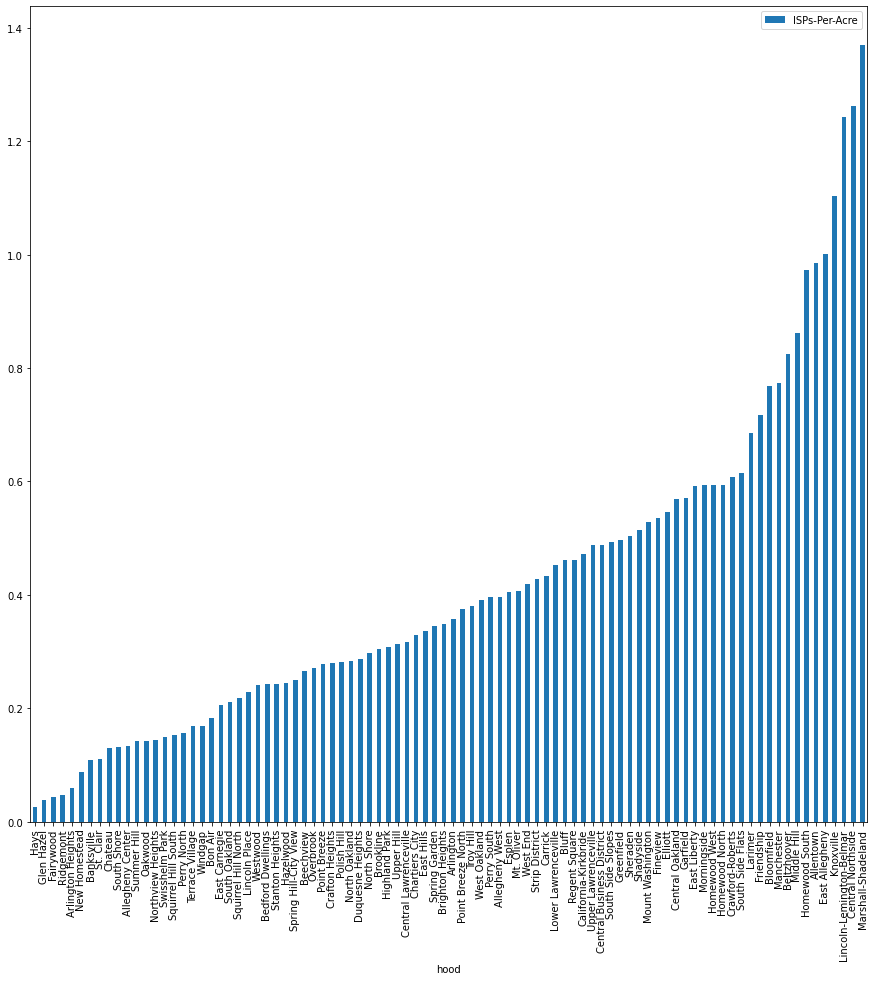

In [24]:
graphable = merged.drop(columns = ["HoldingCompanyName", "acres"])
graphable = graphable.sort_values(by=["ISPs-Per-Acre"])
graphable.plot(x="hood", y="ISPs-Per-Acre", kind="bar", figsize=(15,15))

Finally, I used geopandas to make a map that would show the ISP per Acre for each neighborhood. This lets you see the density of each neighborhood's ISP data based on how big the actual neighborhood is. It is very obvious in both of these graphs that Marshall-Shadeland is the best neighborhood for Verizon internet per Acre.

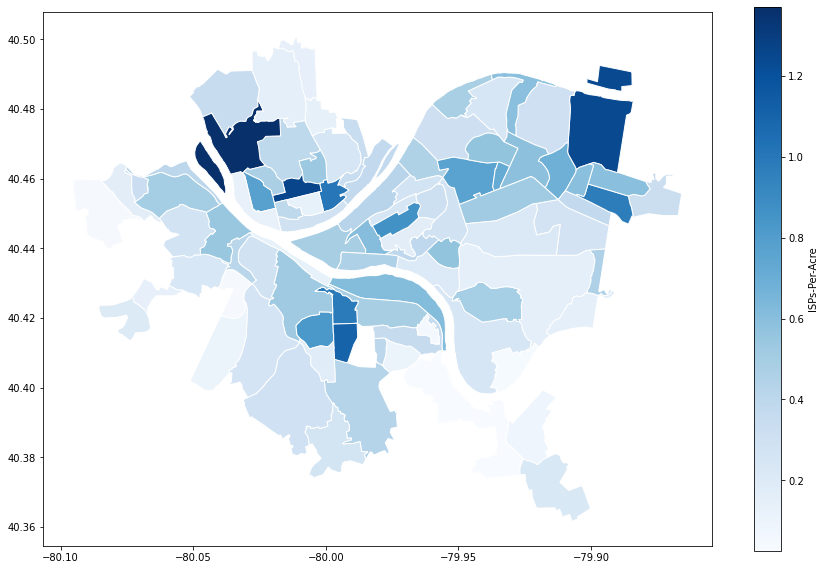

In [29]:
neighborhoods = geopandas.read_file("Neighborhood/Neighborhoods_.shp") # read in the shapefile
sign_map = neighborhoods.merge(graphable, how='left', left_on='hood', right_on='hood')
sign_map.plot(column='ISPs-Per-Acre', # set the data to be used for coloring
               cmap='Blues',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "ISPs-Per-Acre"}, # label the legend
               figsize=(15, 10),         # set the size
              # missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )


This block simply converts the data I interpreted into a form that can be combined with the other two datasets from the project.

In [34]:
combiner=[]
for value in graphable["ISPs-Per-Acre"]:
    combiner.append((value/graphable.iloc[89,1])*100)

graphable["Scaled"] = combiner
ISPDrop = graphable.drop(columns=['ISPs-Per-Acre'])
ISPDrop = graphableDrop.sort_values(by=["hood"])
print(graphableDrop)

                   hood     Scaled
0      Allegheny Center   9.756045
1        Allegheny West  28.933378
2             Allentown  72.005138
3             Arlington  26.081671
4     Arlington Heights   4.315382
..                  ...        ...
85  Upper Lawrenceville  35.614459
86             West End  30.638297
87         West Oakland  28.492075
88             Westwood  17.554704
89              Windgap  12.319806

[90 rows x 2 columns]


The final answer for my dataset is that Marshall-Shadeland has the most ISPs per Acre out of all the neighborhoods I was dealing with. This is shown in the calculations and the two provided graphs.